In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, accuracy_score,recall_score

# Create Data Frame using pandas using read_csv 
df = pd.read_csv("Iris.csv")

In [2]:
# To get first n rows for the object based on position.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Compute Statistical summary of the data frame.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check the shape of the Data Frame
print(df.shape)

(150, 6)


In [6]:
from sklearn.model_selection import train_test_split
feature_cols = ['SepalLengthCm' ,'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']
X = df.iloc[:,[1,2,3,4]].values
y = df.iloc[:,5].values
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25)

In [7]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [9]:
#prediction
y_pred = classifier.predict(X_test)          #Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))


Accuracy Score: 1.0


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]


In [11]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

[Text(167.4, 199.32, 'X[2] <= -0.82\ngini = 0.665\nsamples = 112\nvalue = [34, 39, 39]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 0.669\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 0.635\ngini = 0.206\nsamples = 43\nvalue = [0, 38, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 0.536\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 0.404\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 0.925\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154

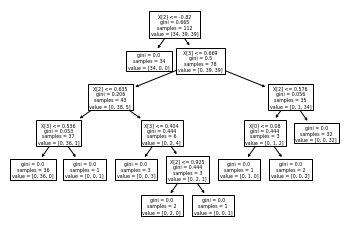

In [12]:
from sklearn import tree
tree.plot_tree(classifier)